In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Операции сужения (erosion), расширения (dilation), закрытия (closing) и открытия (opening

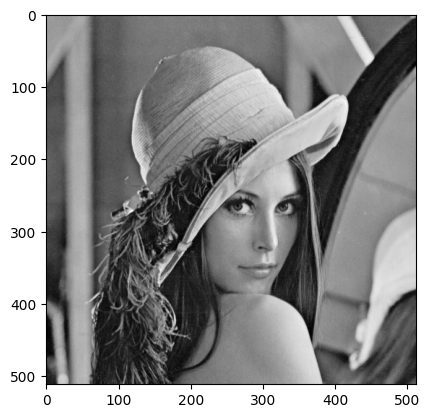

In [3]:

def add_salt_and_peper_noise(im, fraction=0.01):
    assert (0 < fraction <= 1.), "Fraction must be in (0, 1]"

    sp = np.zeros(im.shape)
    percent = round(fraction * 100 / 2.)

    cv.randu(sp, 0, 100)

    # quarter salt quarter pepper
    im_sp = im.copy()
    im_sp[sp < percent] = 0
    im_sp[sp > 100 - percent] = 255
    return im_sp

image = cv.imread('../images/lenna_bad.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
noise_image = add_salt_and_peper_noise(image, 0.02)
plt.imshow(image, 'gray')

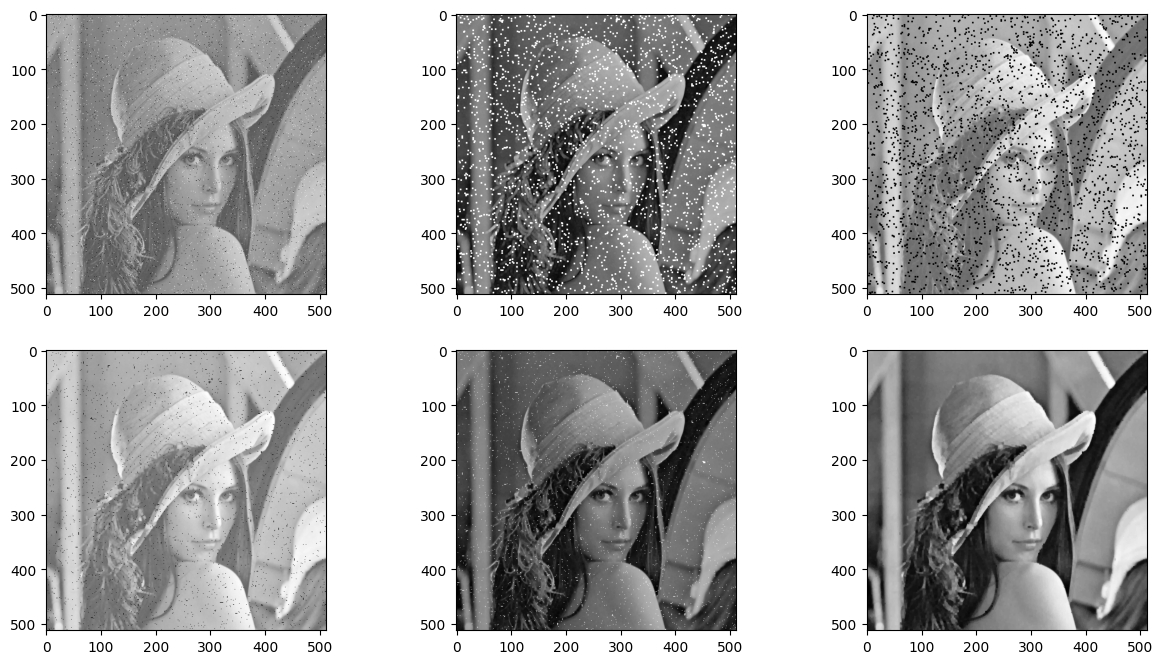

In [4]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv.dilate(noise_image, kernel, iterations=1)
erosion = cv.erode(noise_image, kernel, iterations=1)
opening = cv.morphologyEx(noise_image, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(noise_image, cv.MORPH_CLOSE, kernel)
closeAndOpen = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(15, 8))
plt.subplot(231)
plt.imshow(noise_image, 'gray')
plt.subplot(232)
plt.imshow(dilation, 'gray')
plt.subplot(233)
plt.imshow(erosion, 'gray')
plt.subplot(234)
plt.imshow(opening, 'gray')
plt.subplot(235)
plt.imshow(closing, 'gray')
plt.subplot(236)
plt.imshow(closeAndOpen, 'gray')
plt.show()